In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import time

import experiment_helpers as eh
import train

In [2]:
tf.compat.v1.disable_eager_execution()

In [3]:
model_tf = tf.keras.models.Sequential()
model_tf.add(tf.keras.layers.Input(shape=(9,)))
model_tf.add(tf.keras.layers.Dense(18, activation='sigmoid'))
model_tf.add(tf.keras.layers.Dense(9, activation='linear'))
model_tf.compile(loss='mse', optimizer='adam', metrics=['mae'])
model_tf.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 171       
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [4]:
num_games = 100
start_time = time.time()
(outcomes, metadata) = train.q_learning(model_tf, num_games)
end_time = time.time()
total_time = end_time - start_time
print("total time:", total_time)

Game 1 of 100.
Game 11 of 100.
Game 21 of 100.
Game 31 of 100.
Game 41 of 100.
Game 51 of 100.
Game 61 of 100.
Game 71 of 100.
Game 81 of 100.
Game 91 of 100.
total time: 1.9781131744384766


In [5]:
(invalid, loss, tie, win) = eh.calculate_training_sequence(outcomes)

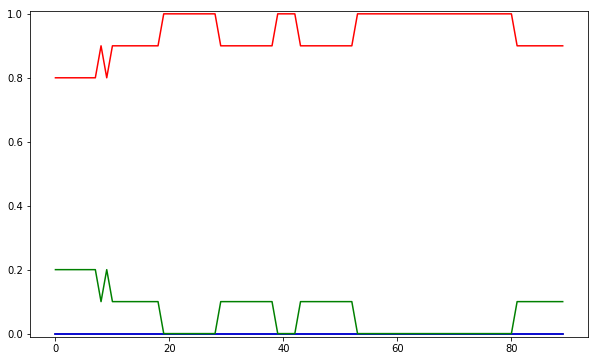

In [6]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)
y_lenth = len(invalid)
ax.plot(list(range(y_lenth)), invalid, 'r')
ax.plot(list(range(y_lenth)), loss, 'k')
ax.plot(list(range(y_lenth)), tie, 'b')
ax.plot(list(range(y_lenth)), win, 'g')
ax.set_ylim(-0.01, 1.01)
plt.show()

In [7]:
metadata

{'decay_factor': 0.999,
 'eps': 0.4523960735568548,
 'num_games': 100,
 'opponent': 'random',
 'rewards': (0, 0.25, 0.5, 2),
 'state_values': (1, 0, -1),
 'y': 0.95}

In [ ]:
model_directory = 'model_v1'
model.save(model_directory)

In [ ]:
m = tf.keras.models.load_model(model_directory)

In [ ]:
m.summary()